In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
df=pd.read_csv('/kaggle/input/obesity-prediction/obesity_data.csv')

In [4]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


# EDA

In [5]:
df.shape

(1000, 7)

### Missing values

In [6]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

### Duplicated values


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [10]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# df['ObesityCategory']=le.fit_transform(df['ObesityCategory'])
# df

In [11]:
numerical_col=['Age','Height','Weight','BMI']
categorical_col=['Gender','ObesityCategory']

In [12]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


### Summary Statistics

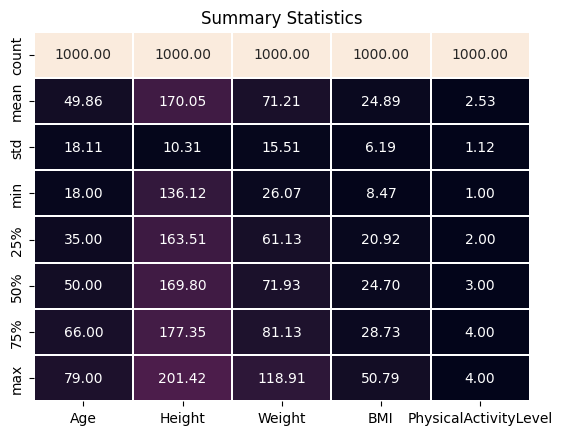

In [13]:

sns.heatmap(df.describe(),annot=True,cmap=None,linewidths=0.1,linecolor='white',fmt='0.2f',cbar=False)
plt.title('Summary Statistics')
plt.show()

### Correlation Matrix

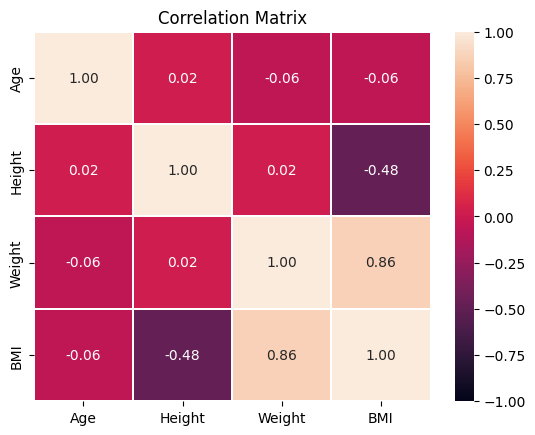

In [14]:
sns.heatmap(df[numerical_col].corr(),cmap='rocket',vmin=-1,vmax=1,annot=True,linewidths=0.1,linecolor='white',fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

### Pairplot

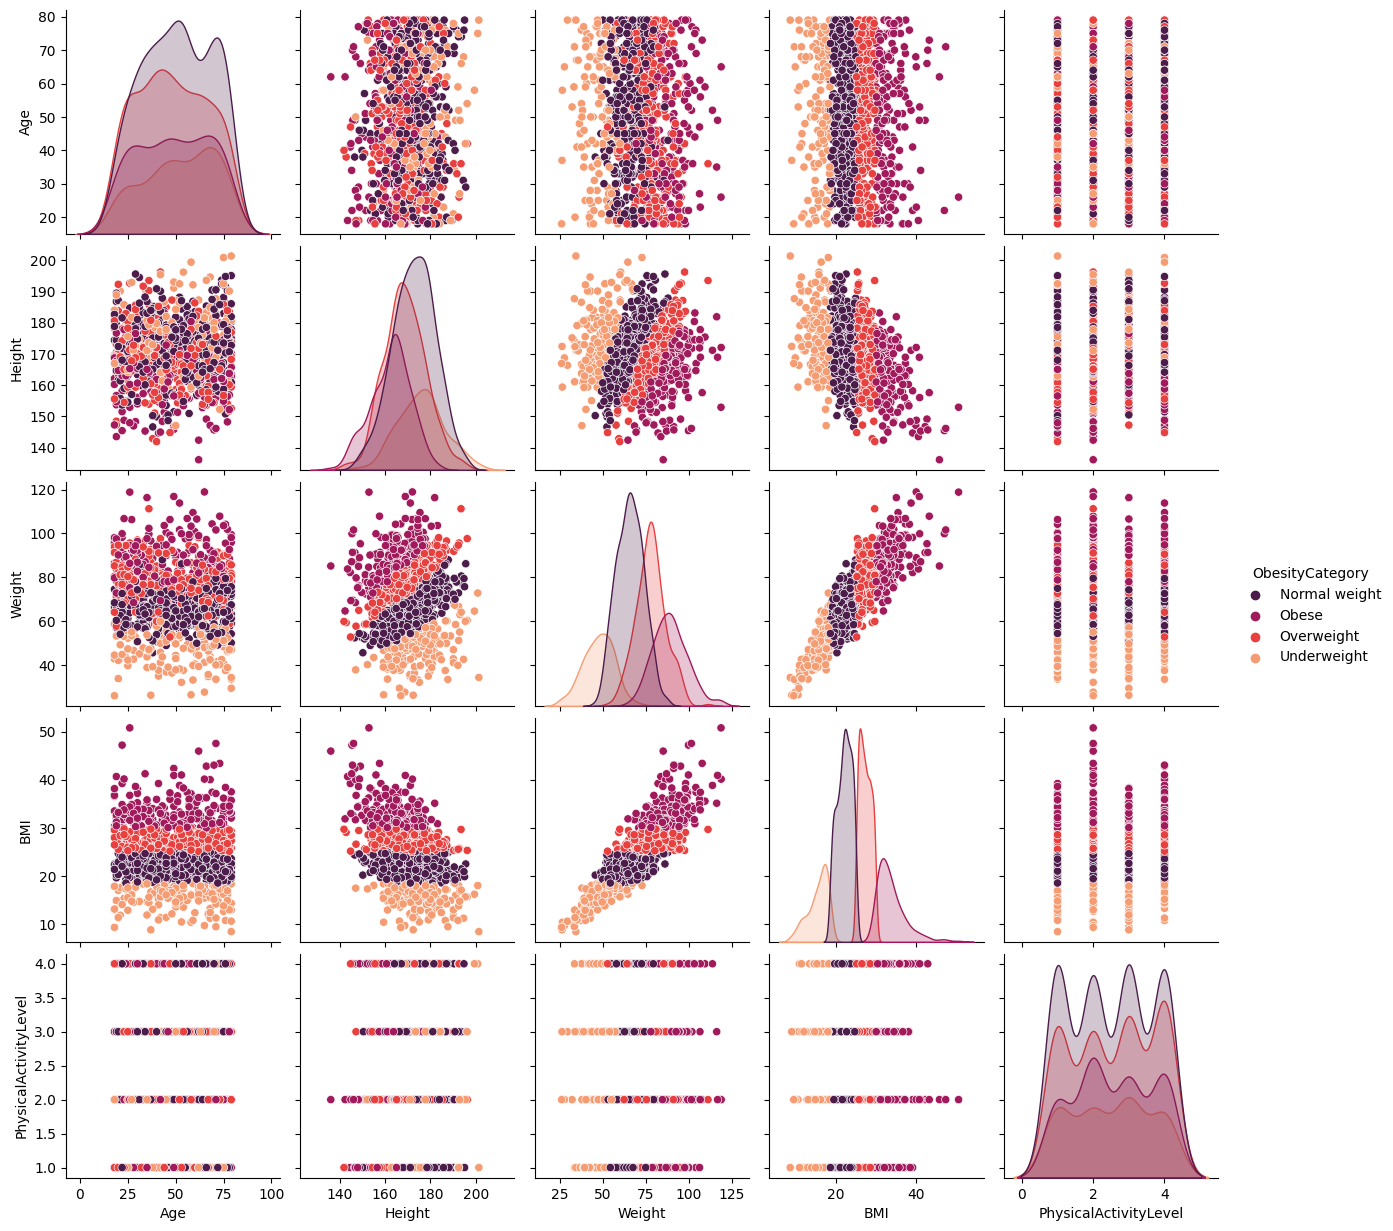

In [15]:
sns.pairplot(df,hue='ObesityCategory',palette='rocket')
plt.show()

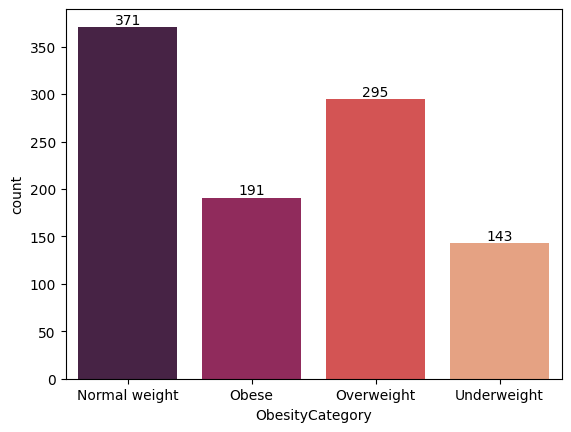

In [16]:
ax=sns.countplot(x='ObesityCategory',data=df,palette='rocket')
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
df.head(2)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese


### Age Distribution by Obesity Category

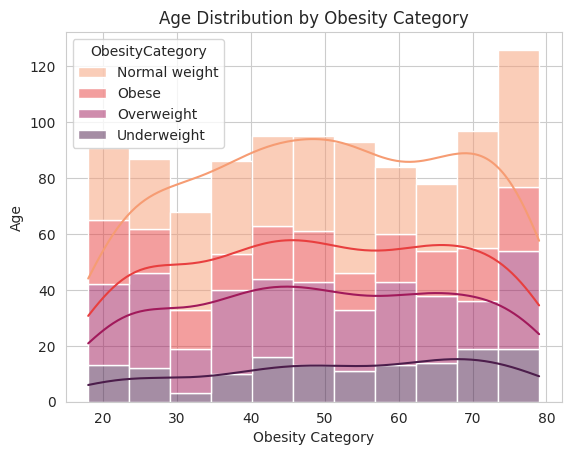

In [18]:

sns.set_style("whitegrid")
sns.histplot(data=df, x='Age', kde=True, palette='rocket_r', hue='ObesityCategory', multiple='stack')
plt.xlabel('Obesity Category')
plt.ylabel('Age')
plt.title('Age Distribution by Obesity Category')
plt.show()

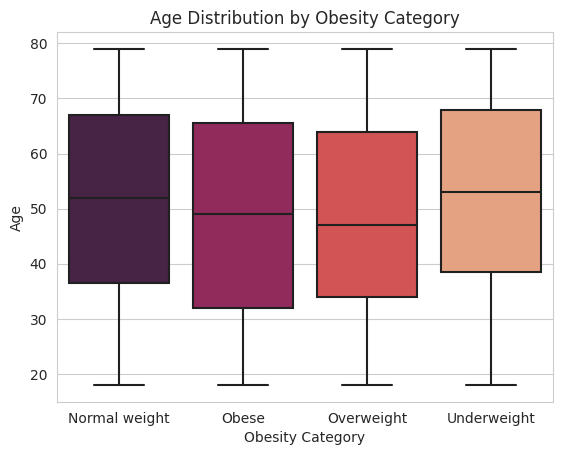

In [19]:
sns.set_style("whitegrid")
sns.boxplot(data=df, x='ObesityCategory', y='Age', palette='rocket')
plt.xlabel('Obesity Category')
plt.ylabel('Age')
plt.title('Age Distribution by Obesity Category')
plt.show()


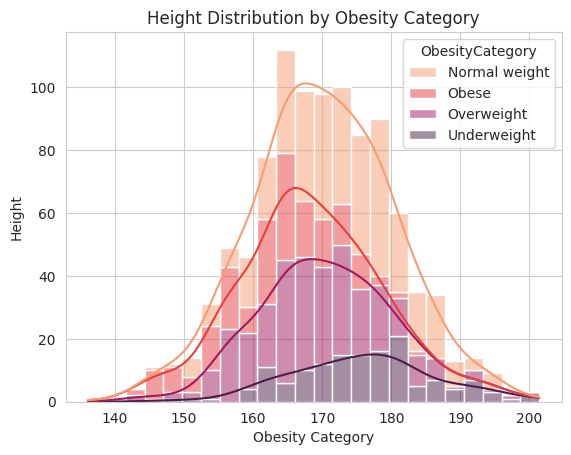

In [20]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='Height', kde=True, palette='rocket_r', hue='ObesityCategory', multiple='stack')
plt.xlabel('Obesity Category')
plt.ylabel('Height')
plt.title('Height Distribution by Obesity Category')
plt.show()

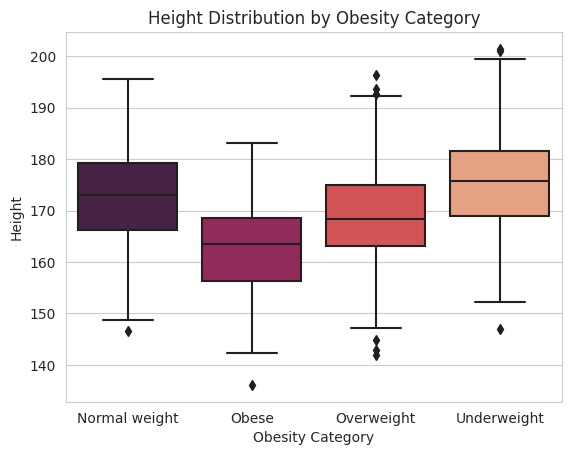

In [21]:
sns.set_style("whitegrid")
sns.boxplot(data=df, x='ObesityCategory', y='Height', palette='rocket')
plt.xlabel('Obesity Category')
plt.ylabel('Height')
plt.title('Height Distribution by Obesity Category')
plt.show()


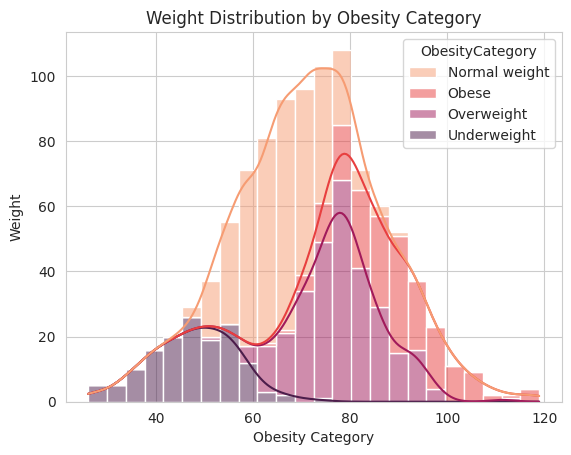

In [22]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='Weight', kde=True, palette='rocket_r', hue='ObesityCategory', multiple='stack')
plt.xlabel('Obesity Category')
plt.ylabel('Weight')
plt.title('Weight Distribution by Obesity Category')
plt.show()

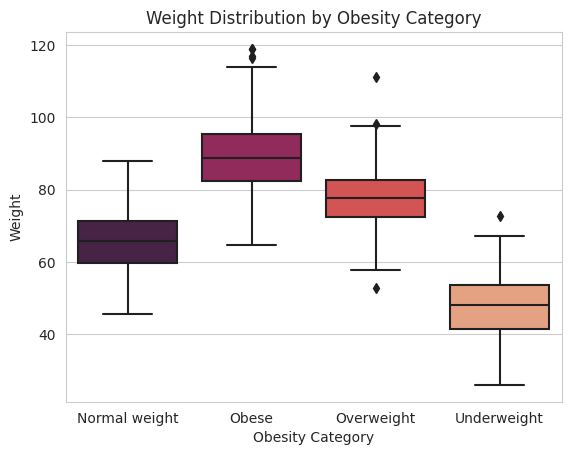

In [23]:
sns.set_style("whitegrid")
sns.boxplot(data=df, x='ObesityCategory', y='Weight', palette='rocket')
plt.xlabel('Obesity Category')
plt.ylabel('Weight')
plt.title('Weight Distribution by Obesity Category')
plt.show()


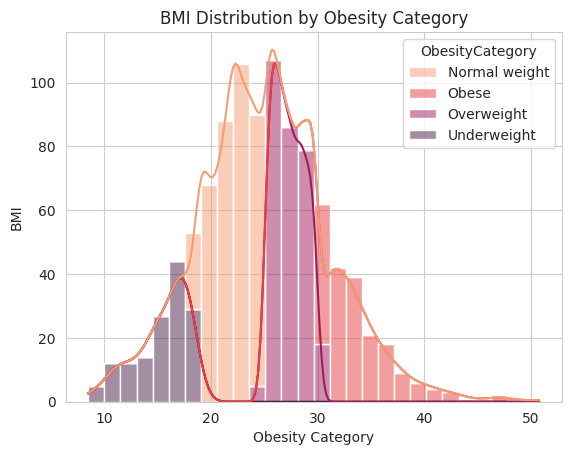

In [24]:
sns.set_style("whitegrid")
sns.histplot(data=df, x='BMI', kde=True, palette='rocket_r', hue='ObesityCategory', multiple='stack')
plt.xlabel('Obesity Category')
plt.ylabel('BMI')
plt.title('BMI Distribution by Obesity Category')
plt.show()

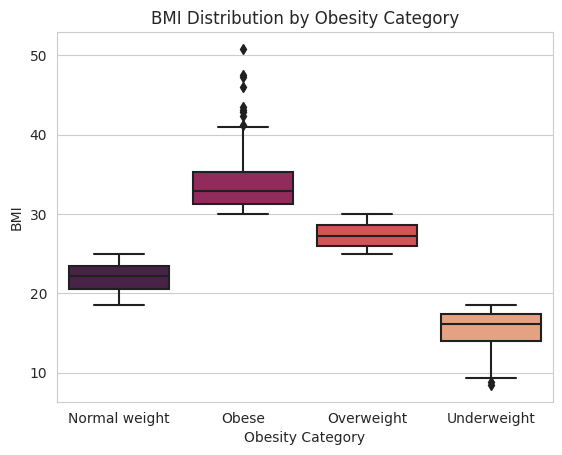

In [25]:
sns.set_style("whitegrid")
sns.boxplot(data=df, x='ObesityCategory', y='BMI', palette='rocket')
plt.xlabel('Obesity Category')
plt.ylabel('BMI')
plt.title('BMI Distribution by Obesity Category')
plt.show()

In [26]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [27]:
Le = LabelEncoder()
df['Gender'] = Le.fit_transform(df['Gender'])
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,Normal weight
1,69,1,164.127306,89.959256,33.395209,2,Obese
2,46,0,168.072202,72.930629,25.817737,4,Overweight
3,32,1,168.459633,84.886912,29.912247,3,Overweight
4,60,1,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4,Overweight
996,35,0,165.076490,97.639771,35.830783,1,Obese
997,49,0,156.570956,78.804284,32.146036,1,Obese
998,64,1,164.192222,57.978115,21.505965,4,Normal weight


### Gender Distribution

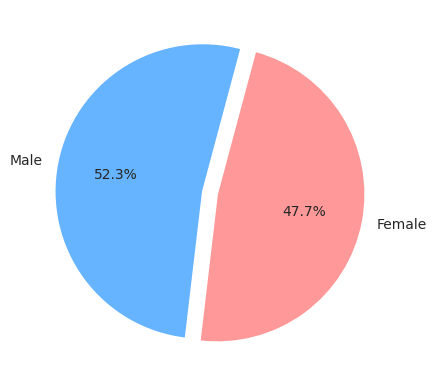

In [28]:
colors = ['#66b3ff','#ff9999']
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',explode=[0.1,0.0],startangle=75,colors=colors)
plt.show()

### Gender Distribution by Obesity Category

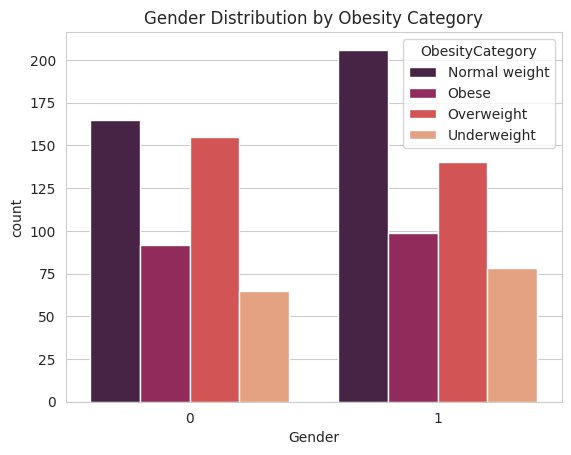

In [29]:
sns.countplot(x='Gender',hue='ObesityCategory',data=df,palette='rocket')
plt.xlabel('Gender')
plt.title('Gender Distribution by Obesity Category')
plt.show()

### PhysicalActivityLevel Distribution by Obesity Category

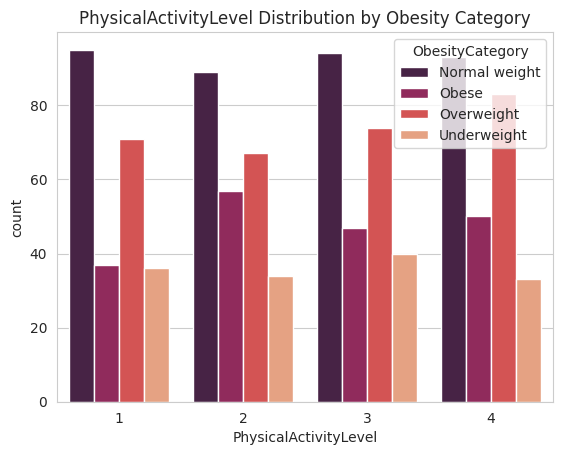

In [30]:
sns.countplot(x='PhysicalActivityLevel',hue='ObesityCategory',data=df,palette='rocket')
plt.xlabel('PhysicalActivityLevel')
plt.title('PhysicalActivityLevel Distribution by Obesity Category')
plt.show()

## Training the Random Forest Classifier

In [31]:
X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


k_folds = 10  
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in tqdm(stratified_kfold.split(X, y), total=k_folds, desc="Cross-validation"):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_classifier.fit(X_train, y_train)
    
    y_pred = rf_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

accuracy_mean = np.mean(accuracy_scores)
accuracy_std = np.std(accuracy_scores)
precision_mean = np.mean(precision_scores)
precision_std = np.std(precision_scores)
recall_mean = np.mean(recall_scores)
recall_std = np.std(recall_scores)
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)


from tabulate import tabulate

metrics_data = [
    ["Accuracy", accuracy_mean, accuracy_std],
    ["Precision", precision_mean, precision_std],
    ["Recall", recall_mean, recall_std],
    ["F1 Score", f1_mean, f1_std]
]

print(tabulate(metrics_data, headers=["Metric", "Mean", "Standard Deviation"], floatfmt=".3f"))


Cross-validation: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]

Metric       Mean    Standard Deviation
---------  ------  --------------------
Accuracy    0.998                 0.004
Precision   0.998                 0.004
Recall      0.998                 0.004
F1 Score    0.998                 0.004


## Model Evaluation

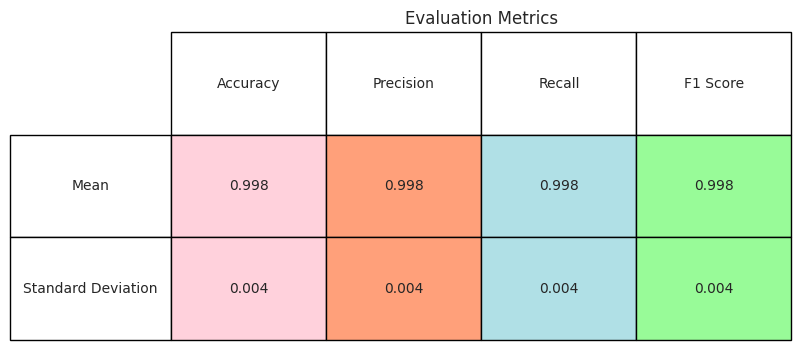

In [32]:
from matplotlib.colors import LinearSegmentedColormap
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
means = [0.998, 0.998, 0.998, 0.998]
stds = [0.004, 0.004, 0.004, 0.004]
colors = ['#FFD1DC', '#FFA07A', '#B0E0E6', '#98FB98']
cmap = LinearSegmentedColormap.from_list("rocket_custom", colors)
plt.figure(figsize=(8, 4))
plt.table(cellText=[means, stds],
          rowLabels=["Mean", "Standard Deviation"],
          colLabels=metrics,
          loc='center',
          cellLoc='center',
          rowLoc='center',
          colLoc='center',
          bbox=[0, 0, 1, 1],
          cellColours=[colors] * 2)  
plt.axis('off')  
plt.title('Evaluation Metrics')
plt.show()


### Confusion Matrix

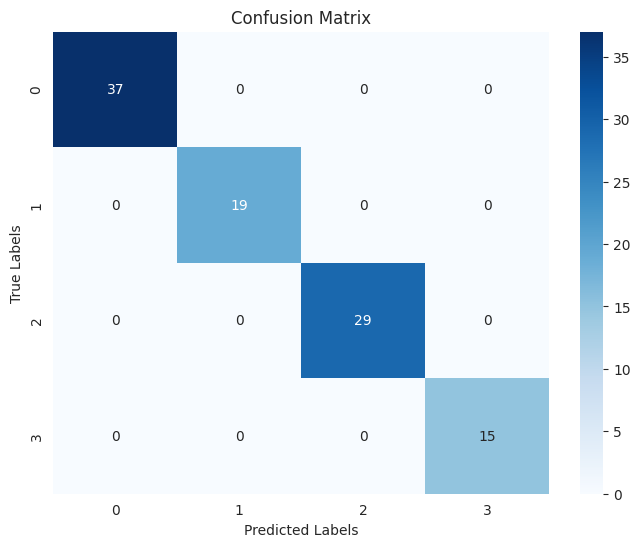

In [33]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Evaluation Metrics

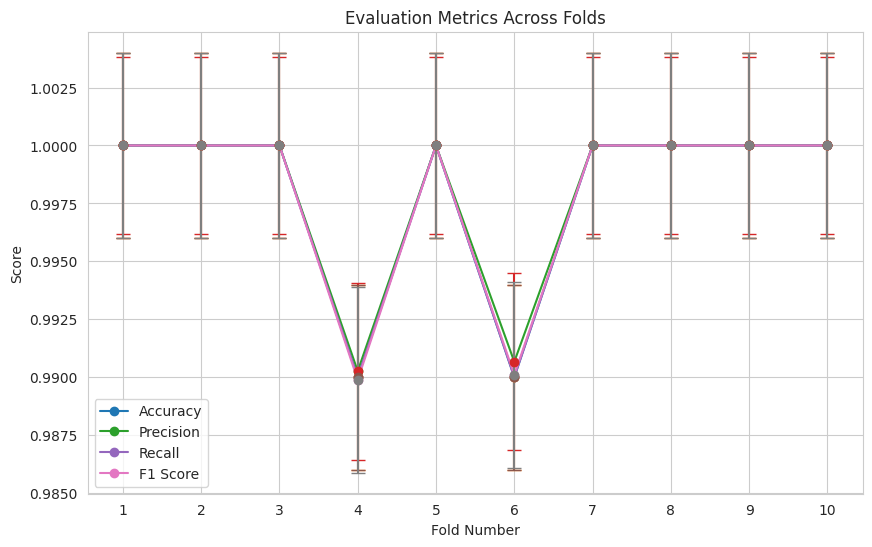

In [34]:
import matplotlib.pyplot as plt
num_folds = len(accuracy_scores)
folds = list(range(1, num_folds + 1))
plt.figure(figsize=(10, 6))
plt.plot(folds, accuracy_scores, marker='o', label='Accuracy')
plt.errorbar(folds, accuracy_scores, yerr=accuracy_std, fmt='o', capsize=5)
plt.plot(folds, precision_scores, marker='o', label='Precision')
plt.errorbar(folds, precision_scores, yerr=precision_std, fmt='o', capsize=5)
plt.plot(folds, recall_scores, marker='o', label='Recall')
plt.errorbar(folds, recall_scores, yerr=recall_std, fmt='o', capsize=5)
plt.plot(folds, f1_scores, marker='o', label='F1 Score')
plt.errorbar(folds, f1_scores, yerr=f1_std, fmt='o', capsize=5)
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.title('Evaluation Metrics Across Folds')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()


## Predicting Obesity Category

In [35]:
predicted_label = rf_classifier.predict([[40,1,160,56,30,3]])
print("Predicted label:", predicted_label)

Predicted label: ['Overweight']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
